# 4. Deep learning

In [86]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [184]:
import time
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import trange
from time import sleep

In [139]:
def errorrate(y_pred, y_true):
    error = sum([y_pred[i]!=y_true[i] for i in range(len(y_true))])
    return error/len(y_true)

In [140]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)#.to(device)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)#.to(device)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


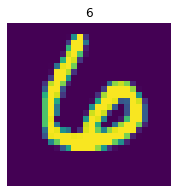

In [141]:
import matplotlib.pyplot as plt
X_test = test_data . test_data . numpy ()
Y_test = test_data . test_labels . numpy ()
image_idx = np.random.choice(range(X_test.shape[0]))
image = X_test[image_idx]
image_class = Y_test[image_idx]
plt.figure(figsize=(3, 3))
plt.imshow(X_test[image_idx].astype("uint8"))
plt.title(image_class)
_ = plt.axis("off")

In [200]:
# Define the model
# import libraries
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        hidden_1 = 100
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        self.output = nn.Linear(hidden_1, 10)

        #self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))

        # add output layer
        x = self.output(x)
        return x

# initialize the NN
model_1 = Net()
model_1 = model_1.to(device)
# model.cuda()
print(model_1)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=10, bias=True)
)


In [291]:
def tt(seed, model, criterion = nn.CrossEntropyLoss()):
    torch.manual_seed(seed)
    model = Net()
    model = model.to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    model.train() 
    LOSS, train_ACC, test_ACC  = [],[],[]
    for epoch in trange(n_epochs, desc='New trial'):
        sleep(0.01)
        # monitor training loss
        train_loss = 0.0
        t0 = time.time()
        ###################
        # train the model #
        ###################
        for data, target in train_loader: #train_loader:train_labels = to_categorical(Y_train)
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()

            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()*data.size(0)
                
        # print training statistics 
        # calculate average loss over an epoch
        train_loss = train_loss/len(train_loader)
        LOSS.append(train_loss)


        train_error = 0
        for traindata, traintarget in train_loader:
            traindata = traindata.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(traindata)
            _, pred = torch.max(output, 1)
            pred = pred.cpu().numpy()
            train_error += errorrate(pred,traintarget.numpy())/len(train_loader)
        train_ACC.append(train_error)

        test_error = 0
        for testdata, testtarget in test_loader:
            testdata = testdata.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(testdata)
            _, pred = torch.max(output, 1)
            pred = pred.cpu().numpy()
            test_error += errorrate(pred,testtarget.numpy())/len(test_loader)
        test_ACC.append(test_error)

        # print('Epoch: {} \tEpoch runtime: {:.2f} \tTraining Loss: {:.6f} \tTest Loss:{:.6f}'.format(
        #     epoch+1, 
        #     time.time() - t0,
        #     train_error,
        #     test_error
        #     ))
        
    return train_ACC, test_ACC
    

# cnn_accuracy = accuracy_score(Y_test, cnn_prediction)
# print('FINAL Test Error of a CNN is: ', errorrate(cnn_prediction,Y_test))
# print('FINAL Accuracy_score of a CNN is: ', cnn_accuracy)

## 4.(a)
How does the network’s performance differ on the training set versus
the validation set during learning? Use the plot of training and testing error curves to
support your argument.

In [296]:
n_epochs = 5
cnn1_accuracy_summary = []
train_acc, test_acc = [],[]
lr = 0.1

trial = [123,234,345,456,567]
for seed in trial:
    train_ACC, test_ACC = tt(seed, model_1)
    train_acc.append(train_ACC)
    test_acc.append(test_ACC)


New trial:  20%|██        | 1/5 [00:12<00:50, 12.63s/it]

Epoch: 1 	Epoch runtime: 12.62 	Training Loss: 0.050700 	Test Loss:0.050100


New trial:  40%|████      | 2/5 [00:25<00:38, 12.72s/it]

Epoch: 2 	Epoch runtime: 12.77 	Training Loss: 0.034983 	Test Loss:0.038600


New trial:  60%|██████    | 3/5 [00:38<00:25, 12.69s/it]

Epoch: 3 	Epoch runtime: 12.65 	Training Loss: 0.026533 	Test Loss:0.032000


New trial:  80%|████████  | 4/5 [00:50<00:12, 12.71s/it]

Epoch: 4 	Epoch runtime: 12.72 	Training Loss: 0.023450 	Test Loss:0.030400


New trial: 100%|██████████| 5/5 [01:03<00:00, 12.68s/it]


Epoch: 5 	Epoch runtime: 12.58 	Training Loss: 0.020033 	Test Loss:0.029400


New trial:  20%|██        | 1/5 [00:12<00:50, 12.60s/it]

Epoch: 1 	Epoch runtime: 12.59 	Training Loss: 0.051133 	Test Loss:0.051300


New trial:  40%|████      | 2/5 [00:25<00:38, 12.67s/it]

Epoch: 2 	Epoch runtime: 12.71 	Training Loss: 0.032083 	Test Loss:0.037100


New trial:  60%|██████    | 3/5 [00:38<00:25, 12.71s/it]

Epoch: 3 	Epoch runtime: 12.74 	Training Loss: 0.025133 	Test Loss:0.031300


New trial:  80%|████████  | 4/5 [00:50<00:12, 12.67s/it]

Epoch: 4 	Epoch runtime: 12.59 	Training Loss: 0.021083 	Test Loss:0.029300


New trial: 100%|██████████| 5/5 [01:03<00:00, 12.67s/it]


Epoch: 5 	Epoch runtime: 12.67 	Training Loss: 0.018233 	Test Loss:0.027800


New trial:  20%|██        | 1/5 [00:12<00:50, 12.66s/it]

Epoch: 1 	Epoch runtime: 12.65 	Training Loss: 0.049083 	Test Loss:0.051200


New trial:  40%|████      | 2/5 [00:25<00:37, 12.64s/it]

Epoch: 2 	Epoch runtime: 12.61 	Training Loss: 0.032717 	Test Loss:0.036300


New trial:  60%|██████    | 3/5 [00:37<00:25, 12.62s/it]

Epoch: 3 	Epoch runtime: 12.59 	Training Loss: 0.024550 	Test Loss:0.031000


New trial:  80%|████████  | 4/5 [00:50<00:12, 12.63s/it]

Epoch: 4 	Epoch runtime: 12.64 	Training Loss: 0.019950 	Test Loss:0.028400


New trial: 100%|██████████| 5/5 [01:03<00:00, 12.63s/it]


Epoch: 5 	Epoch runtime: 12.61 	Training Loss: 0.016933 	Test Loss:0.027500


New trial:  20%|██        | 1/5 [00:12<00:50, 12.70s/it]

Epoch: 1 	Epoch runtime: 12.69 	Training Loss: 0.053083 	Test Loss:0.053100


New trial:  40%|████      | 2/5 [00:25<00:37, 12.66s/it]

Epoch: 2 	Epoch runtime: 12.62 	Training Loss: 0.034233 	Test Loss:0.037600


New trial:  60%|██████    | 3/5 [00:38<00:25, 12.68s/it]

Epoch: 3 	Epoch runtime: 12.70 	Training Loss: 0.026750 	Test Loss:0.030800


New trial:  80%|████████  | 4/5 [00:50<00:12, 12.65s/it]

Epoch: 4 	Epoch runtime: 12.59 	Training Loss: 0.020883 	Test Loss:0.028200


New trial: 100%|██████████| 5/5 [01:03<00:00, 12.65s/it]


Epoch: 5 	Epoch runtime: 12.61 	Training Loss: 0.017483 	Test Loss:0.026300


New trial:  20%|██        | 1/5 [00:12<00:50, 12.64s/it]

Epoch: 1 	Epoch runtime: 12.63 	Training Loss: 0.051950 	Test Loss:0.051500


New trial:  40%|████      | 2/5 [00:25<00:37, 12.62s/it]

Epoch: 2 	Epoch runtime: 12.60 	Training Loss: 0.034117 	Test Loss:0.039400


New trial:  60%|██████    | 3/5 [00:37<00:25, 12.64s/it]

Epoch: 3 	Epoch runtime: 12.64 	Training Loss: 0.027033 	Test Loss:0.033900


New trial:  80%|████████  | 4/5 [00:50<00:12, 12.58s/it]

Epoch: 4 	Epoch runtime: 12.49 	Training Loss: 0.021667 	Test Loss:0.030100


New trial: 100%|██████████| 5/5 [01:02<00:00, 12.59s/it]

Epoch: 5 	Epoch runtime: 12.55 	Training Loss: 0.017183 	Test Loss:0.028200


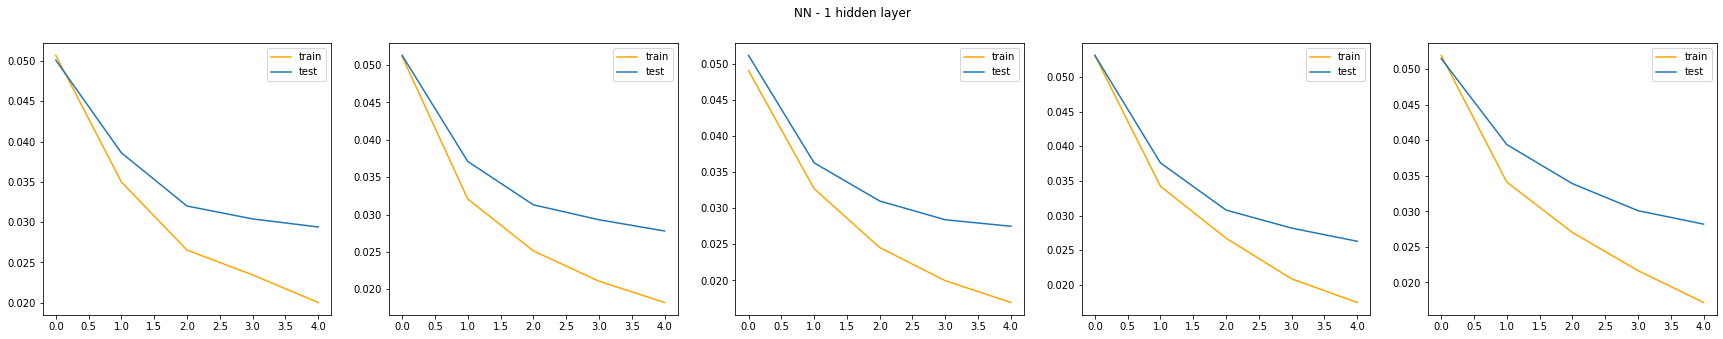

In [297]:
import seaborn as sns
fig, axes = plt.subplots(1, 5, figsize=(30, 5))
fig.suptitle('NN - 1 hidden layer')
for i in range(len(trial)):
    # ax = 
    sns.lineplot(ax=axes[i], x = list(range(n_epochs)), y = train_acc[i], color = 'orange', label='train')
    # ax = ax.twinx()
    # axes[i] = plt.twinx()
    sns.lineplot(ax=axes[i], x = list(range(n_epochs)), y = test_acc[i], label='test')

A: 

## 4.(b) ! UNFINISHED!!
We could implement an alternative performance measure to the cross entropy, the mean
miss-classification error.
Plot the classification error (in percentage) vs. number of epochs, for
both training and testing. Do you observe a different behavior compared to the behavior
of the cross-entropy error function?

In [294]:
def miss_classification_loss(output, target):
    _, pred = torch.max(output, 1)
    diff = torch.eq(pred, target)/len(pred)
    loss = torch.sum(diff)
    loss.requires_grad= True
    return loss#torch.tensor(loss).to(device)

In [ ]:
def miss_classification_loss(output, target):
    _, pred = torch.max(output, 1)
    for i in range(len(target)):
        loss += target
    diff = torch.eq(pred, target)/len(pred)
    loss = torch.sum(diff)
    loss.requires_grad= True
    return loss#torch.tensor(loss).to(device)

In [295]:
n_epochs = 5
cnn1_accuracy_summary = []
train_acc, test_acc = [],[]
lr = 0.1

trial = [123,234,345,456,567]
for seed in trial:
    train_ACC, test_ACC = tt(seed, model_1, miss_classification_loss)
    train_acc.append(train_ACC)
    test_acc.append(test_ACC)

New trial:  20%|██        | 1/5 [00:12<00:48, 12.01s/it]

Epoch: 1 	Epoch runtime: 12.00 	Training Loss: 0.886900 	Test Loss:0.882900


New trial:  40%|████      | 2/5 [00:24<00:36, 12.01s/it]

Epoch: 2 	Epoch runtime: 11.99 	Training Loss: 0.886900 	Test Loss:0.882900


New trial:  60%|██████    | 3/5 [00:35<00:23, 11.97s/it]

Epoch: 3 	Epoch runtime: 11.91 	Training Loss: 0.886900 	Test Loss:0.882900


New trial:  80%|████████  | 4/5 [00:48<00:12, 12.01s/it]

Epoch: 4 	Epoch runtime: 12.06 	Training Loss: 0.886900 	Test Loss:0.882900


New trial: 100%|██████████| 5/5 [00:59<00:00, 11.99s/it]


Epoch: 5 	Epoch runtime: 11.93 	Training Loss: 0.886900 	Test Loss:0.882900


New trial:  20%|██        | 1/5 [00:14<00:59, 14.79s/it]

Epoch: 1 	Epoch runtime: 14.78 	Training Loss: 0.863450 	Test Loss:0.860000


New trial:  40%|████      | 2/5 [00:26<00:39, 13.25s/it]

Epoch: 2 	Epoch runtime: 12.16 	Training Loss: 0.863450 	Test Loss:0.860000


New trial:  60%|██████    | 3/5 [00:41<00:27, 13.87s/it]

Epoch: 3 	Epoch runtime: 14.58 	Training Loss: 0.863450 	Test Loss:0.860000


New trial:  80%|████████  | 4/5 [00:54<00:13, 13.40s/it]

Epoch: 4 	Epoch runtime: 12.67 	Training Loss: 0.863450 	Test Loss:0.860000


New trial: 100%|██████████| 5/5 [01:09<00:00, 13.94s/it]


Epoch: 5 	Epoch runtime: 15.45 	Training Loss: 0.863450 	Test Loss:0.860000


New trial:  20%|██        | 1/5 [00:12<00:48, 12.18s/it]

Epoch: 1 	Epoch runtime: 12.17 	Training Loss: 0.942067 	Test Loss:0.940700


New trial:  40%|████      | 2/5 [00:24<00:36, 12.03s/it]

Epoch: 2 	Epoch runtime: 11.91 	Training Loss: 0.942067 	Test Loss:0.940700


New trial:  60%|██████    | 3/5 [00:37<00:25, 12.70s/it]

Epoch: 3 	Epoch runtime: 13.49 	Training Loss: 0.942067 	Test Loss:0.940700


New trial:  80%|████████  | 4/5 [00:49<00:12, 12.40s/it]

Epoch: 4 	Epoch runtime: 11.92 	Training Loss: 0.942067 	Test Loss:0.940700


New trial: 100%|██████████| 5/5 [01:01<00:00, 12.28s/it]


Epoch: 5 	Epoch runtime: 11.87 	Training Loss: 0.942067 	Test Loss:0.940700


New trial:  20%|██        | 1/5 [00:11<00:47, 11.98s/it]

Epoch: 1 	Epoch runtime: 11.97 	Training Loss: 0.869533 	Test Loss:0.865800


New trial:  40%|████      | 2/5 [00:23<00:35, 11.96s/it]

Epoch: 2 	Epoch runtime: 11.93 	Training Loss: 0.869533 	Test Loss:0.865800


New trial:  60%|██████    | 3/5 [00:35<00:23, 11.94s/it]

Epoch: 3 	Epoch runtime: 11.91 	Training Loss: 0.869533 	Test Loss:0.865800


New trial:  80%|████████  | 4/5 [00:48<00:12, 12.19s/it]

Epoch: 4 	Epoch runtime: 12.55 	Training Loss: 0.869533 	Test Loss:0.865800


New trial: 100%|██████████| 5/5 [01:00<00:00, 12.07s/it]


Epoch: 5 	Epoch runtime: 11.91 	Training Loss: 0.869533 	Test Loss:0.865800


New trial:  20%|██        | 1/5 [00:11<00:47, 11.91s/it]

Epoch: 1 	Epoch runtime: 11.89 	Training Loss: 0.915400 	Test Loss:0.916800


New trial:  40%|████      | 2/5 [00:23<00:35, 11.92s/it]

Epoch: 2 	Epoch runtime: 11.91 	Training Loss: 0.915400 	Test Loss:0.916800


New trial:  60%|██████    | 3/5 [00:35<00:23, 11.91s/it]

Epoch: 3 	Epoch runtime: 11.88 	Training Loss: 0.915400 	Test Loss:0.916800


New trial:  80%|████████  | 4/5 [00:47<00:11, 11.94s/it]

Epoch: 4 	Epoch runtime: 11.98 	Training Loss: 0.915400 	Test Loss:0.916800


New trial: 100%|██████████| 5/5 [00:59<00:00, 11.92s/it]

Epoch: 5 	Epoch runtime: 11.89 	Training Loss: 0.915400 	Test Loss:0.916800


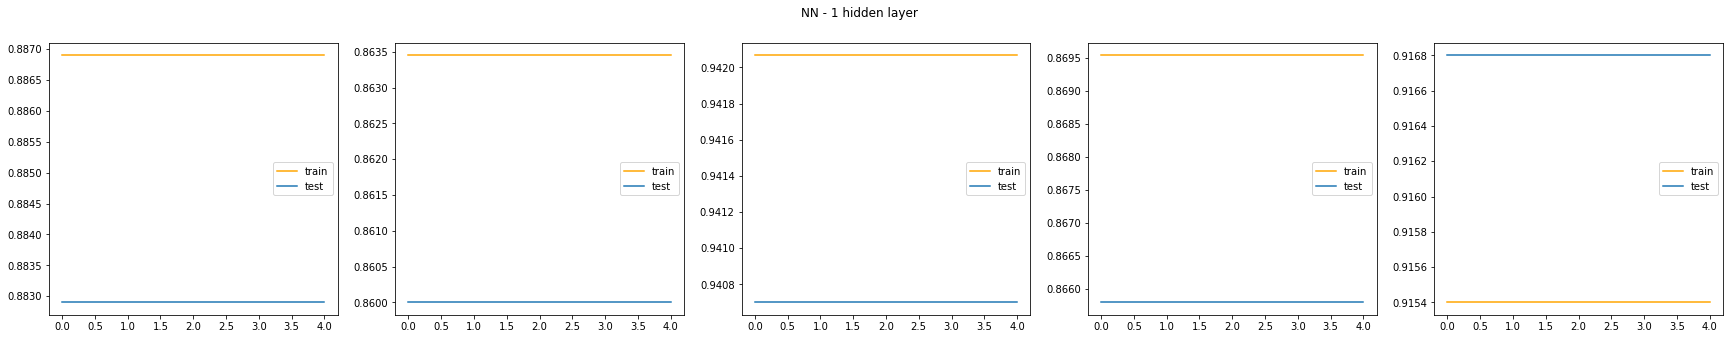

In [273]:
fig, axes = plt.subplots(1, 5, figsize=(30, 5))
fig.suptitle('NN - 1 hidden layer')
for i in range(len(trial)):
    # ax = 
    sns.lineplot(ax=axes[i], x = list(range(n_epochs)), y = train_acc[i], color = 'orange', label='train')
    # ax = ax.twinx()
    # axes[i] = plt.twinx()
    sns.lineplot(ax=axes[i], x = list(range(n_epochs)), y = test_acc[i], label='test')

## 4.(c)
Visualize your best results of the learned W as one hundred 28×28 images (plot all filters
as one image, as we have seen in class). Do the learned features exhibit any structure?

In [301]:
list(model_1.children())

[Linear(in_features=784, out_features=100, bias=True),
 Linear(in_features=100, out_features=10, bias=True)]

In [313]:
model_children[0].weight.detach().cpu().numpy().shape

(100, 784)

In [319]:
model_weights = [] 
conv_layers = [] 
model_children = list(model_1.children())

# counter to keep count of the conv layers
counter = 0 
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    model_weights.append(model_children[i].weight.detach().cpu().numpy())
    conv_layers.append(model_children[i])

print(f"Total convolutional layers: {counter}")

Total convolutional layers: 0


In [325]:
model_weights[0][0].shape

(784,)

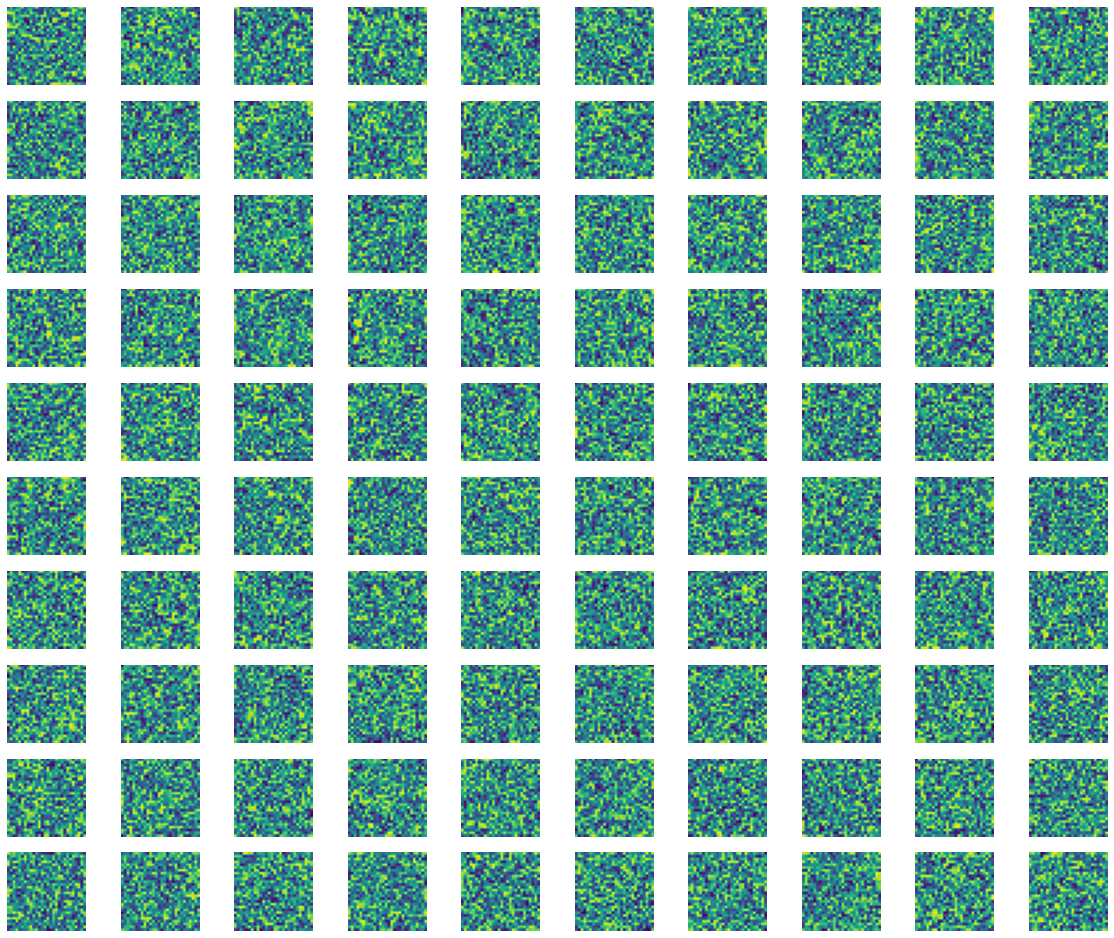

In [330]:
# visualize the first conv layer filters
model_weights = model_weights[:-1]
plt.figure(figsize=(20, 17))
for layer in model_weights:
    for i in range(len(layer)):
        plt.subplot(10, 10, i+1) # we have 5x5 filters and total of 16 (see printed shapes)
        filter = layer[i].reshape(28,28)
        plt.imshow(filter, cmap='viridis')
        plt.axis('off')
        # plt.savefig('filter1.png')
    plt.show()